In [11]:
n_pca_components = 50
n_gmm_components = 10

In [9]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from pandas import DataFrame, Series
import pandas as pd

def load_train_data():
    df: DataFrame = pd.read_csv('../data/train.csv')
    xs: DataFrame = df.iloc[:, 1:]
    ys: Series = df.iloc[:, 0]
    return xs, ys

def get_model(xs, ys):
    pca = PCA(n_components=n_pca_components)
    xs_pca = pca.fit_transform(xs.to_numpy())
    model: GaussianMixture = GaussianMixture(n_components=n_gmm_components)
    model.fit(xs_pca)
    return model, xs_pca

xs, ys = load_train_data()
model, xs_pca = get_model(xs, ys)

In [69]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from pandas import DataFrame, Series
import pandas as pd

def load_train_data():
    df: DataFrame = pd.read_csv('../data/train.csv')
    xs: DataFrame = df.iloc[:, 1:]
    ys: Series = df.iloc[:, 0]
    return xs, ys

def get_model(xs):
    model: GaussianMixture = GaussianMixture(n_components=n_gmm_components)
    model.fit(xs.to_numpy())
    return model

xs, ys = load_train_data()
model = get_model(xs)

In [45]:
import numpy as np
from numpy.typing import NDArray
from typing import Dict
from sklearn.metrics import accuracy_score, confusion_matrix

def get_clusters(xs: NDArray[np.float64], gmm_labels: NDArray[np.int8]) -> Dict[int, NDArray[np.float64]]:
    clusters: Dict[int, NDArray[np.float64]] = {}
    for i in range(n_gmm_components):
        clusters[i] = xs[gmm_labels == i]
    return clusters

def get_cluster_to_digit_mappings(gmm_labels: NDArray[np.int64], ys: NDArray[np.int64]) -> NDArray[np.int64]:
    cluster_to_digit_mapping: NDArray[np.int64] = np.zeros(n_gmm_components, dtype=int)
    for i in range(n_gmm_components):
        cluster_indices: NDArray[np.int64] = np.where(gmm_labels == i)[0]
        true_labels: NDArray[np.int64] = ys[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        cluster_to_digit_mapping[i] = most_common_label
    return cluster_to_digit_mapping

def get_accuracy(ys_true: NDArray[np.float64], ys_pred: NDArray[np.float64]) -> float:
    accuracy: float = accuracy_score(ys_true, ys_pred)
    return accuracy

def get_confusion_matrix(ys_true: NDArray[np.float64], ys_pred: NDArray[np.float64]) -> np.ndarray:
    cm: np.ndarray = confusion_matrix(ys_true, ys_pred)
    return cm

ys_numpy: NDArray[np.float64] = ys.to_numpy()
gmm_labels: NDArray[np.int8] = model.predict(xs)
clusters: Dict[int, NDArray[np.float64]] = get_clusters(xs_pca, gmm_labels)
cluster_to_digit_mapping: NDArray[np.int64] = get_cluster_to_digit_mappings(gmm_labels, ys_numpy)
predicted_digits: NDArray[np.float64] = cluster_to_digit_mapping[gmm_labels]
accuracy: float = get_accuracy(ys_numpy, predicted_digits)
confusion_matrix: np.ndarray = get_confusion_matrix(ys_numpy, predicted_digits)

In [46]:
import io
import matplotlib.pyplot as plt
import seaborn as sns

heat_map = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for GMM Clustering on MNIST (accuracy - {accuracy})')

buf = io.BytesIO()
plt.savefig(buf, format='png')
plt.close()
buf.seek(0)
buf.getvalue()

plt.show()

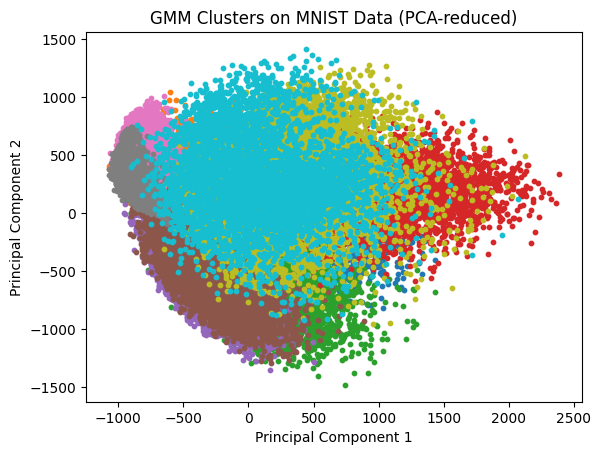

In [19]:
img_buffer = io.BytesIO()
for key, cluster in clusters.items():
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Digit: {cluster_to_digit_mapping[key]}', s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clusters on MNIST Data (PCA-reduced)')
# plt.savefig(img_buffer, format='png', bbox_inches='tight', pad_inches=0)
# plt.close()
# img_buffer.seek(0)
# img_buffer.getvalue()
plt.show()

In [73]:
def sample():
    xs, ys = model.sample()
    return xs[0], ys[0]
    # sample_array = np.array(xs[0]).reshape(28, 28)
    # plt.imshow(sample_array, cmap='gray')
    # plt.title(ys[0])
    # plt.show()

def predict(x):
    y = model.predict([x])
    print(y)
    return y

# sample()
x, y = sample()
print(type(x))
y = predict(x)
# print(xs.shape)
# print(type(xs))

<class 'numpy.ndarray'>
[8]
